In [5]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from torch import nn
from torchvision import datasets
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
import os
import pandas as pd
from torchvision.io import read_image

In [ ]:
train_data = datasets.MNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)
test_data = datasets.MNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

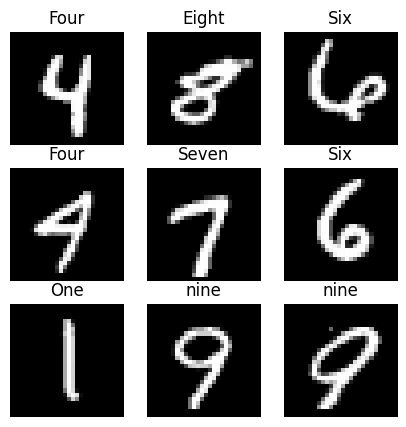

In [3]:
lables_map = {
    0:"Zero",
    1:"One",
    2: "Two",
    3: "Three",
    4: "Four",
    5: "Five",
    6: "Six",
    7: "Seven",
    8: "Eight",
    9: "nine"
}
figure = plt.figure(figsize = (5,5))
cols , rows = 3,3
for i in range(1, cols * rows + 1):
  sample_index = torch.randint(len(train_data), size = (1,)).item()
  img, label = train_data[sample_index]
  figure.add_subplot(rows, cols, i)
  plt.title(lables_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap = "gray")

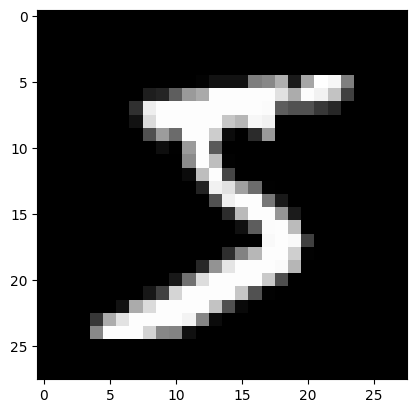

In [4]:
image, label = train_data[0]
plt.imshow(image[0], cmap = "gray")

In [6]:
class custom_dataset(Dataset):
  def __init__(self, anotation, img_dir, transform = None, target_transform = None):
    self.anotation = pd.readcsv(anotation)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform
  def __len__(self):
    return len(self.anotation)
  def __getattr__(self, idx):
    img_path = os.path.join(self.img_dir,self.anotations.iloc[idx, 0])
    image = read_image(img_path)
    label = os.path.join(self.img_dir, self.anotations.iloc[idx, 1])
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)

In [7]:
train_dataloader = DataLoader(train_data, batch_size = 123, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 123, shuffle = True)

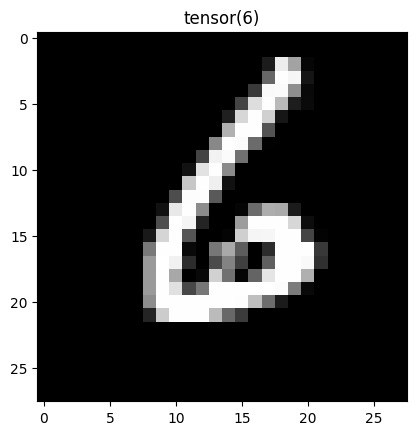

In [30]:
train_features , train_labels = next(iter(train_dataloader))
f = train_features[0].squeeze()
g = train_labels[0]
plt.title(g)
plt.imshow(f, cmap = "gray")